<a href="https://colab.research.google.com/github/Adityachoundaj/Data-Analytics/blob/main/Regression%20with%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regression with Keras

### Step 1: Read the data

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Target feature here is PE (Power Plant Energy output)
## Step 2 - Perform Basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [4]:
df.duplicated().sum()

41

In [5]:
df.duplicated().sum()/len(df)

0.004285117056856187

# Step 3: Seperate X and Y(PE)

In [6]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [7]:
X

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [8]:
Y

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43
...,...
9563,462.59
9564,432.90
9565,465.96
9566,450.93


# Step 4: Create a Preprocessing Pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')


In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


# Step 5: Apply train test split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [13]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [14]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [15]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [16]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


# Step 5: Build the Keras neural network

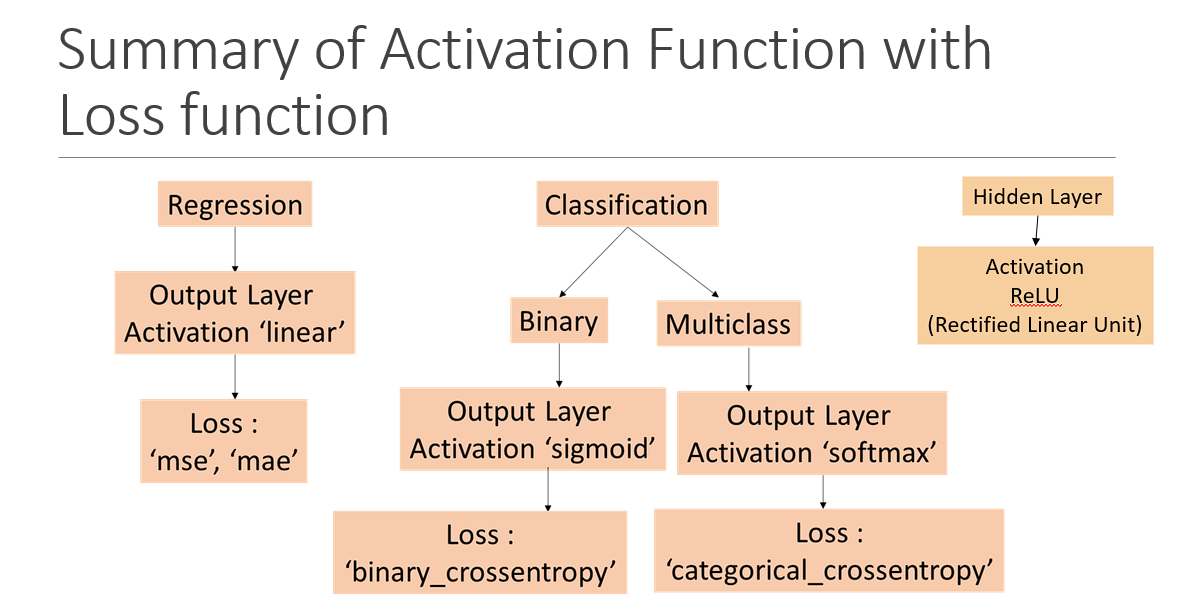

In [17]:
xtrain.shape[1]

4

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [19]:
# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [22]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
192/192 [==============================] - 4s 4ms/step - loss: 204730.2656 - mae: 452.2052 - val_loss: 201654.4219 - val_mae: 448.8476
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 195178.2812 - mae: 441.6134 - val_loss: 184037.0000 - val_mae: 428.8905
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 166039.4688 - mae: 406.5888 - val_loss: 144134.7969 - val_mae: 377.7452
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 118949.3281 - mae: 338.4305 - val_loss: 95118.4297 - val_mae: 296.0909
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 74618.2109 - mae: 252.8770 - val_loss: 59419.1445 - val_mae: 219.1794
Epoch 6/100
192/192 [==============================] - 1s 3ms/step - loss: 47190.8633 - mae: 192.6416 - val_loss: 39174.5977 - val_mae: 174.6070
Epoch 7/100
192/192 [==============================] - 1s 3ms/step - loss: 31001.1113 - mae: 153.1457 - val_loss: 26049.142

In [24]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 2ms/step - loss: 21.3019 - mae: 3.6743


[21.301897048950195, 3.674267292022705]

In [25]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 3ms/step - loss: 19.6871 - mae: 3.5488


[19.6871395111084, 3.548839569091797]

# Plot the learning curve

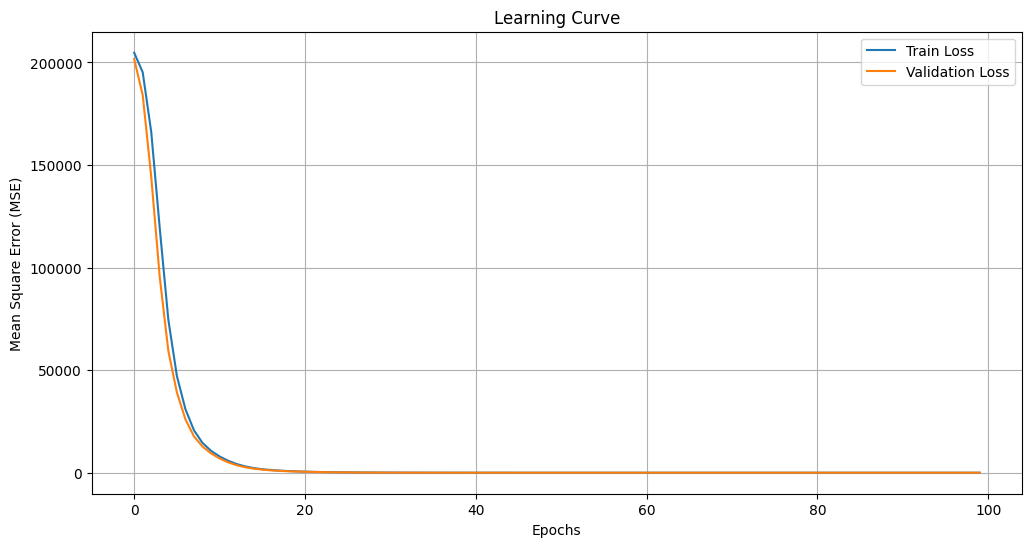

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


In [27]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 4ms/step


In [28]:
ypred_train

array([[442.04178],
       [435.0236 ],
       [434.30795],
       ...,
       [462.23563],
       [437.6954 ],
       [483.11765]], dtype=float32)

In [29]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [30]:
ypred_test[0:5]

array([[435.35315],
       [437.0446 ],
       [462.04504],
       [476.74332],
       [436.33524]], dtype=float32)

In [31]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


# Perform detailed evaluation

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')

In [35]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 0s 2ms/step
Mean Squared Error : 21.30
Root Mean Squared Error : 4.62
Mean Absolute Error : 3.67
R2 Score : 0.9272


In [36]:
evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 2ms/step
Mean Squared Error : 19.69
Root Mean Squared Error : 4.44
Mean Absolute Error : 3.55
R2 Score : 0.9312



# R2 score in test is 0.9336 > 0.8 hence above model is very good

# Saving above model (.keras)

In [37]:
model.save("PowerOutput.keras")

# Load the above model

In [38]:
from keras.models import load_model

In [39]:
M = load_model("/content/PowerOutput.keras")

In [41]:
M.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
M.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[-0.54338086,  0.10940286,  0.02929808, -0.5648456 ,  0.23745878,
          0.60759187,  0.06215669, -0.76472396],
        [-0.5853751 , -0.63471895,  1.4951211 , -0.2860881 , -0.6811157 ,
          1.2307664 , -0.3676971 , -0.42456192],
        [ 0.28641888, -0.21228296, -0.44966605, -1.1088594 ,  0.7406101 ,
          0.24854754,  0.43794546,  0.07964112],
        [-0.33184353,  0.54483813, -0.08869236,  0.25858653,  0.06018281,
          0.03923837,  0.4556563 , -1.0523523 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([2.8633518, 2.9213662, 3.3432252, 2.9271934, 3.0051935, 3.4832392,
        2.7732158, 2.909066 ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[1.3502798, 1.9411411, 2.2951214, 2.1684697],
        [2.5188427, 1.8354179, 2.0051122, 1.399067 ],
        [1.6477535, 1.7418544, 2.5489492, 2.668368 ],
        [1